In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
from datetime import datetime

#AGRUPAR POR REF_HASH CON SU DETERMINADA FRECUENCIA DE CLICKS
clicks = pd.read_csv('C:/Datos/clicks.csv.gzip', compression='gzip')
clicks
clicks_Reduced = clicks[['ref_hash']]
clicks_Reduced['cantidad_clicks']=1
clicks_Reduced.dtypes
clicks_Reduced_agrupado = clicks_Reduced.groupby(('ref_hash'))['cantidad_clicks'].sum()
clicks_Reduced_agrupado = clicks_Reduced_agrupado.to_frame()


clicks_Reduced_agrupado = clicks_Reduced_agrupado.reset_index()

# MUESTRA CADA REF_HASH CON SU CORRESPONDIENTE CANTIDAD DE CLICKS EN ORDEN DE MAYOR A MENOR
clicks_Reduced_agrupado = clicks_Reduced_agrupado.sort_values(by='cantidad_clicks', ascending=False)
clicks_Reduced_agrupado

c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,ref_hash,cantidad_clicks
7487,4063522808706112974,41
12676,6841615430383729819,32
2374,1244272413279716745,26
2794,1486699123421703687,21
1687,871778630200697460,21
9399,5087801386146573665,20
1801,925803901826809324,17
9507,5141358577301248038,16
10007,5410279713092214908,16
12912,6972928558719957056,16


In [2]:
#Se declaran los tipos de datos de cada columna para que consuma menos memoria que los tipos de datos que se asignan automaticamente en el read_csv 
# ALGUNOS DATOS SE VAN A CORTAR YA QUE LOS DECLARO COMO INT8. NO IMPORTA PORQUE NO LOS VOY A USAR

dtypes = {'ref_type': 'int64', 'event_id': 'int8', 'ref_hash': 'int64', 'application_id': 'int64', 'device_countrycode': 'int8', 'device_os_version': 'float16'}
parse_dates = ['date']
    
events = pd.read_csv('C:/Datos/events.csv.gzip', compression='gzip', iterator=True, dtype = dtypes, parse_dates = parse_dates, low_memory=False, error_bad_lines = False, chunksize=1000)
events = pd.concat(events, ignore_index=True)


events_reduced = events[['ref_hash', 'attributed']]

#filtro_events=((events_reduced['attributed'] == True))  ESO ES PARA DISCRIMINAR LOS DE JAMMP. MAS ADELANTE..
#events_reduced = events_reduced[filtro_events]
    
events_reduced['cantidad_eventos']=1
events_reduced.dtypes,
events_reduced_agrupado = events_reduced.groupby(('ref_hash'))['cantidad_eventos'].sum()
events_reduced_agrupado = events_reduced_agrupado.to_frame()
    
#Resetea los indices
events_reduced_agrupado = events_reduced_agrupado.reset_index()
    

# CANTIDAD DE EVENTOS POR CADA REF_HASH
events_reduced_agrupado = events_reduced_agrupado.sort_values(by='cantidad_eventos', ascending=False)
events_reduced_agrupado


c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,ref_hash,cantidad_eventos
166330,7823950631004872496,2913
155141,7298478026707033340,2822
106987,5034957474698180142,2681
121743,5724169280369284055,2524
36191,1706781657278990931,2300
5123,244029859389272148,2240
159967,7526135353349769077,2079
188763,8876061431560425145,2053
2040,99390558091295167,1966
53500,2514745445577342929,1925


In [3]:
#CARGO EL ARCHIVO CON LOS INSTALLS

installs = pd.read_csv('C:/Datos/installs.csv.gzip', compression='gzip')

installs_reduced = installs[['ref_hash']]
installs_reduced['cantidad_instalaciones']=1
installs_reduced.dtypes
installs_reduced_agrupado = installs_reduced.groupby(('ref_hash'))['cantidad_instalaciones'].sum()
installs_reduced_agrupado = installs_reduced_agrupado.to_frame()

#Resetea los indices 
installs_reduced_agrupado = installs_reduced_agrupado.reset_index()


# MUESTRA CADA REF_HASH CON SU CORRESPONDIENTE CANTIDAD DE INSTALLS ORDENADOS DE MAYOR A MENOR
installs_reduced_agrupado = installs_reduced_agrupado.sort_values(by='cantidad_instalaciones', ascending=False)
installs_reduced_agrupado

c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ref_hash,cantidad_instalaciones
1069,3272750442824629569,4
1710,5208834946313176321,4
271,808602801225309575,3
657,1951826604052927528,3
1764,5376622639905210608,3
824,2457547163021424058,3
1507,4603142710878547974,3
2673,8209340170282049305,3
671,1999001885916451618,3
839,2515049144505739996,3


In [15]:
#CRUZO EVENTS CON CLICKS Y CON INSTALLS TOMANDO EL DATO REF_HASH 

events_clicks = pd.merge(events_reduced_agrupado, clicks_Reduced_agrupado, on='ref_hash', how='inner')
events_clicks_installs = pd.merge(events_clicks, installs_reduced_agrupado, on='ref_hash', how='inner')

events_clicks_installs

,ref_hash,cantidad_eventos,cantidad_clicks,cantidad_instalaciones
0,8187571300120427764,9,1,1
1,1254317779988816837,6,1,1
2,582930240149217282,2,4,1
3,3685364020547088390,2,1,1
4,2369915544093215150,2,1,1


Text(0.5, 1.0, 'Cantidad de events, clicks e installs por dispositivo (que tenga todo)')

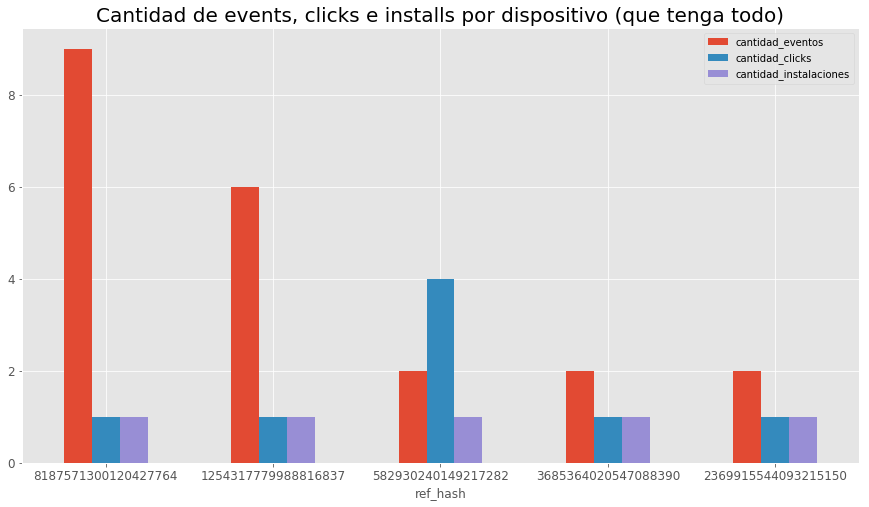

In [37]:
#LO GRAFICO

import matplotlib.pyplot as plt

index = events_clicks_installs['ref_hash']
cantidad_eventos = events_clicks_installs['cantidad_eventos']
cantidad_clicks = events_clicks_installs['cantidad_clicks']
cantidad_instalaciones = events_clicks_installs['cantidad_instalaciones']

df = pd.DataFrame({'cantidad_eventos': cantidad_eventos,
                   'cantidad_clicks': cantidad_clicks, 'cantidad_instalaciones': cantidad_instalaciones}, index=index)

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
ax = df.plot.bar(rot=0, fontsize = 12)
ax.set_title('Cantidad de events, clicks e installs por dispositivo (que tenga todo)',fontsize= 20)



In [43]:
# AHORA TOMO SOLO LOS EVENTOS ATRIBUIDOS A JAMPP Y HAGO EL MISMO ANALISIS

filtro_events=((events_reduced['attributed'] == True)) 
events_reduced_jampp = events_reduced[filtro_events]
    
events_reduced_jampp['cantidad_eventos']=1
events_reduced_jampp.dtypes,
events_reduced_jampp_agrupado = events_reduced_jampp.groupby(('ref_hash'))['cantidad_eventos'].sum()
events_reduced_jampp_agrupado = events_reduced_jampp_agrupado.to_frame()
    
#Resetea los indices
events_reduced_jampp_agrupado = events_reduced_jampp_agrupado.reset_index()
    

# CANTIDAD DE EVENTOS POR CADA REF_HASH
events_reduced_jampp_agrupado = events_reduced_jampp_agrupado.sort_values(by='cantidad_eventos', ascending=False)
events_reduced_jampp_agrupado

c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ref_hash,cantidad_eventos
311,4153352203585747855,158
439,5811896797087419802,118
578,7486989802522901338,100
457,6029310702021823009,74
280,3772418259157950973,67
540,6965689922078677353,65
315,4177765538033131574,60
482,6277828456639372113,58
673,8777825808407309602,56
369,4923328447417029910,56


In [44]:
#CRUZO DEVULTA EVENTS CON CLICKS Y CON INSTALLS TOMANDO EL DATO REF_HASH 

eventsjampp_clicks = pd.merge(events_reduced_jampp_agrupado, clicks_Reduced_agrupado, on='ref_hash', how='inner')
eventsjampp_clicks_installs = pd.merge(eventsjampp_clicks, installs_reduced_agrupado, on='ref_hash', how='inner')

#NO DEVUELVE DATO ALGUNO.
#ESTO QUIERE DECIR QUE NO HAY NINGUN EVENTO ATRIBUIDO A JAMPP QUE HAYA PRODUCIDO ALGUN CLICK Y LUEGO ALGUNA INSTALACION
eventsjampp_clicks_installs

,ref_hash,cantidad_eventos,cantidad_clicks,cantidad_instalaciones
